<a href="https://colab.research.google.com/github/Nicolas-Noir/AA2-TUIA-2025/blob/main/Practica/AA2_lab5_b_01_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5b - Clasificacion de imagenes: piedra, papel o tijeras.

El objetivo de este laboratorio es entrenar un clasificador de imagenes para el siguiente dataset utilizando una red densa:

https://public.roboflow.com/classification/rock-paper-scissors/

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [ ]:
import os

REPO_NAME = "lab5"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)



Cloning into 'lab5'...
remote: Enumerating objects: 2962, done.
remote: Counting objects: 100% (2962/2962), done.
remote: Compressing objects: 100% (2958/2958), done.
remote: Total 2962 (delta 6), reused 2957 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (2962/2962), 15.51 MiB | 13.86 MiB/s, done.
Resolving deltas: 100% (6/6), done.


Importar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from PIL import Image

Establecer GPU por defecto en caso de estar disponible.

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

Cargar y visualizar los datos.

Ejemplos de entrenamiento: (2892, 64, 64)
Ejemplos de test: (33, 64, 64)


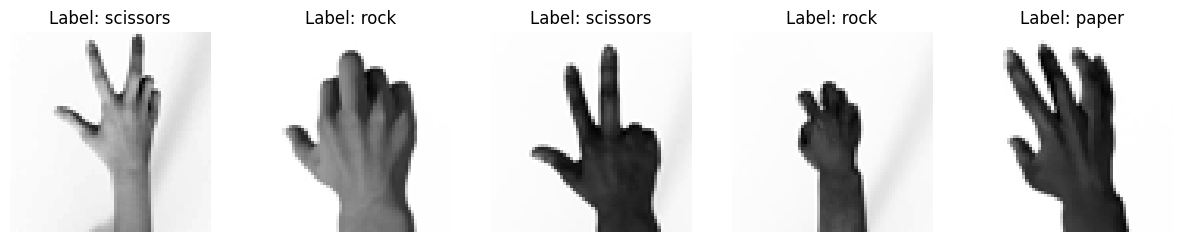

In [ ]:
CLASS_NAMES = ['paper', 'rock', 'scissors']

def load_dataset(directory, target_size=(64, 64)):
    images = []
    labels = []
    classes = sorted(os.listdir(directory))
    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = Image.open(image_path).convert('L')  # Convertir a grayscale
            image = image.resize(target_size)  # Resize the image
            image = np.array(image)
            images.append(image)
            labels.append(CLASS_NAMES[class_idx])
    return np.array(images), np.array(labels)

# Dataset folder
dataset_dir = 'rock-paper-scissors/'

# Cargar el dataset
X_train, y_train = load_dataset(os.path.join(dataset_dir, 'dataset'))
X_test, y_test = load_dataset(os.path.join(dataset_dir, 'test-dataset-dense'))

# Normalizing the data
X_train, X_test = X_train / 255.0, X_test / 255.0
print("Ejemplos de entrenamiento:", X_train.shape)
print("Ejemplos de test:", X_test.shape)

# Mostramos algunos ejemplos al azar:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    idx = np.random.randint(0, X_train.shape[0])
    axs[i].imshow(X_train[idx], cmap='gray')
    axs[i].set_title(f"Label: {y_train[idx]}")
    axs[i].axis('off')
plt.show()